### Environment settings

In [1]:
"""
    Importing needed libs
"""

'\n    Importing needed libs\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def custom_aggregator(x):
    return np.median(np.absolute(x - np.median(x)))

### Data loading

In [4]:
data = pd.read_csv('../outputs/experiment_runs_cost.csv')
data['community_detector'] = data['community_detector'].replace('Not-Applicable', 'Default')
display(data)

,dataset,community_detector,community,algorithm_rec,test_size,split_id,train_runtime,test_runtime
0,synthetic,Default,NaN,NormalPredictor,0.25,1,0.003009,0.005865
1,synthetic,Default,NaN,SVD,0.25,1,0.026604,0.005842
2,synthetic,Default,NaN,k-NN,0.25,1,0.005436,0.039929
3,synthetic,Default,NaN,NMF,0.25,1,0.024823,0.004628
4,synthetic,Default,NaN,Co-Clustering,0.25,1,0.043572,0.002998
...,...,...,...,...,...,...,...,...
1801,real,Paris,2.0,NMF,0.01,5,0.357141,0.002000
1802,real,Paris,1.0,Co-Clustering,0.01,5,0.935008,0.003002
1803,real,Paris,2.0,Co-Clustering,0.01,5,0.559295,0.003002
1804,real,Paris,1.0,SlopeOne,0.01,5,0.353072,0.068011


### Evaluation

#### Training time

In [5]:
df = data.copy()
df = df.groupby(['dataset', 'community_detector', 'algorithm_rec', 'test_size', 'split_id'])['train_runtime'].sum().reset_index()
df = df.groupby(['dataset', 'community_detector', 'algorithm_rec', 'test_size'])['train_runtime'].median().reset_index()
df = df.groupby(['dataset', 'community_detector', 'algorithm_rec'])['train_runtime'].median().reset_index()
errors = data.copy()
#errors = errors.groupby(['dataset', 'community_detector', 'algorithm_rec'])['train_runtime'].mad().reset_index()
errors = errors.groupby(['dataset', 'community_detector', 'algorithm_rec'])['train_runtime'].agg(custom_aggregator).reset_index()

display(df)

,dataset,community_detector,algorithm_rec,train_runtime
0,real,Default,Co-Clustering,1.599588
1,real,Default,NMF,1.228970
2,real,Default,NormalPredictor,0.096859
3,real,Default,SVD,0.884101
4,real,Default,SlopeOne,0.539179
5,real,Default,k-NN,0.367061
6,real,Louvain,Co-Clustering,1.375841
7,real,Louvain,NMF,0.870925
8,real,Louvain,NormalPredictor,0.078983
9,real,Louvain,SVD,0.675754


In [6]:
display(errors)

,dataset,community_detector,algorithm_rec,train_runtime
0,real,Default,Co-Clustering,0.214480
1,real,Default,NMF,0.183947
2,real,Default,NormalPredictor,0.011929
3,real,Default,SVD,0.099590
4,real,Default,SlopeOne,0.123087
5,real,Default,k-NN,0.035798
6,real,Louvain,Co-Clustering,0.125451
7,real,Louvain,NMF,0.086260
8,real,Louvain,NormalPredictor,0.006958
9,real,Louvain,SVD,0.073848


In [7]:
models = list(
    set(
        df['algorithm_rec']
        )
    )
models.sort()

methods = list(
    set(
        df['community_detector']
    )
)
methods.sort()
colors = ['#00CED1', '#FFB6C1', '#FFD700']#['navy', 'steelblue', 'lightblue']
bar_width = 0.2
index = np.arange(len(models))


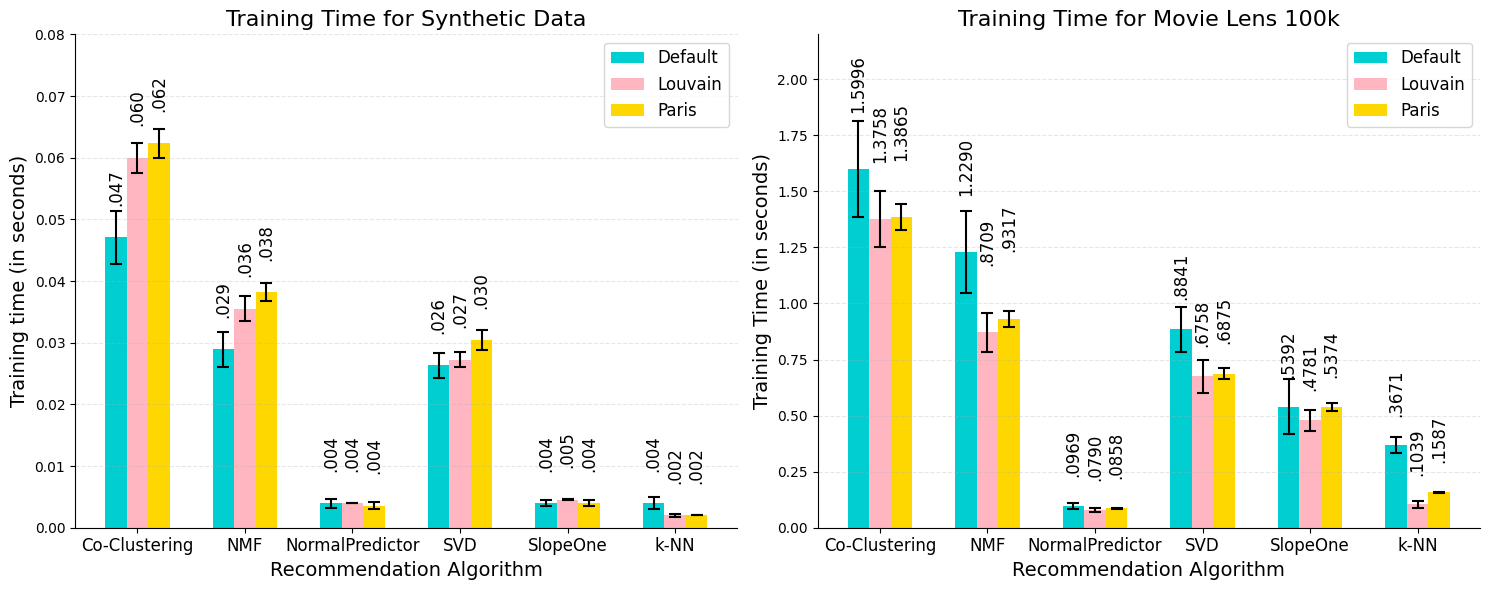

In [15]:
syntpd = df[df['dataset'] == 'synthetic'][['community_detector', 'algorithm_rec', 'train_runtime']]
syntpd = syntpd.sort_values(by=['algorithm_rec', 'community_detector'])
run_synt = syntpd['train_runtime'].values
run_synt = run_synt.reshape(-1, 3)
errorpd = errors[errors['dataset'] == 'synthetic'][['community_detector', 'algorithm_rec', 'train_runtime']]
errorpd = errorpd.sort_values(by=['algorithm_rec', 'community_detector'])
errors_synt = errorpd['train_runtime'].values
errors_synt = errors_synt.reshape(-1, 3)

realpd = df[df['dataset'] == 'real'][['community_detector', 'algorithm_rec', 'train_runtime']]
realpd = realpd.sort_values(by=['algorithm_rec', 'community_detector'])
run_real = realpd['train_runtime'].values
run_real = run_real.reshape(-1, 3)
errorpd = errors[errors['dataset'] == 'real'][['community_detector', 'algorithm_rec', 'train_runtime']]
errorpd = errorpd.sort_values(by=['algorithm_rec', 'community_detector'])
errors_real = errorpd['train_runtime'].values
errors_real = errors_real.reshape(-1, 3)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the bars and adding labels for the synthetic dataset
for i, method in enumerate(methods):
    axes[0].bar(index + (i * bar_width), run_synt[:, i], yerr=errors_synt[:, i], width=bar_width, label=method, 
                color=colors[i], capsize=4, error_kw={'capthick': 1.5})
    for j, value in enumerate(run_synt[:, i]):
        formatted_value = format(value, '.3f').lstrip('0')
        axes[0].annotate(formatted_value, xy=(index[j] + (i * bar_width), value),
                         xytext=(0, 49), textcoords='offset points', ha='center', va='top',
                         fontsize=12, color='black', rotation='vertical')#, fontweight='bold')

# Additional plot settings for the synthetic dataset
axes[0].set_xlabel('Recommendation Algorithm', fontsize=14)#, fontweight='bold')
axes[0].set_ylabel('Training time (in seconds)', fontsize=14)#, fontweight='bold')
axes[0].set_title('Training Time for Synthetic Data', fontsize=16)#, fontweight='bold')
axes[0].set_xticks(index + (bar_width * (len(methods) - 1) / 2))
axes[0].set_xticklabels(models, ha='center')
axes[0].set_ylim(0, 0.08)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].legend(fontsize=12)

# Add horizontal grid lines for the synthetic dataset
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

for i, method in enumerate(methods):
    axes[1].bar(index + (i * bar_width), run_real[:, i], yerr=errors_real[:, i], width=bar_width, label=method, 
                color=colors[i], capsize=4, error_kw={'capthick': 1.5})
    for j, value in enumerate(run_real[:, i]):
        if j >= 2:
            formatted_value = format(value, '.4f').lstrip('0')
            axes[1].annotate(formatted_value, xy=(index[j] + (i * bar_width), value),
                         xytext=(0, 55), textcoords='offset points', ha='center', va='top',
                         fontsize=12, color='black', rotation='vertical')#, fontweight='bold')      
        else:
            formatted_value = format(value, '.4f').lstrip('0')
            axes[1].annotate(formatted_value, xy=(index[j] + (i * bar_width), value),
                         xytext=(0, 82), textcoords='offset points', ha='center', va='top',
                         fontsize=12, color='black', rotation='vertical')#, fontweight='bold')                                      
# Additional plot settings for the real dataset
axes[1].set_xlabel('Recommendation Algorithm', fontsize=14)#, fontweight='bold')
axes[1].set_ylabel('Training Time (in seconds)', fontsize=14)#, fontweight='bold')
axes[1].set_title('Training Time for Movie Lens 100k', fontsize=16)#, fontweight='bold')
axes[1].set_xticks(index + (bar_width * (len(methods) - 1) / 2))
axes[1].set_xticklabels(models, ha='center')
axes[1].set_ylim(0, 2.2)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].legend(fontsize=12)

# Add horizontal grid lines for the real dataset
axes[1].grid(axis='y', linestyle='--', alpha=0.3)

# Remove the top and right spines for both subplots
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.savefig('../plots/experiment_results/cost_comparison/training_plot_V2.pdf')
plt.show()


#### Prediction time

In [16]:
df = data.copy()
df = df.groupby(['dataset', 'community_detector', 'algorithm_rec', 'test_size', 'split_id'])['test_runtime'].sum().reset_index()
df = df.groupby(['dataset', 'community_detector', 'algorithm_rec', 'test_size'])['test_runtime'].median().reset_index()
df = df.groupby(['dataset', 'community_detector', 'algorithm_rec'])['test_runtime'].median().reset_index()
errors = data.copy()
errors = errors.groupby(['dataset', 'community_detector', 'algorithm_rec'])['test_runtime'].agg(custom_aggregator).reset_index()

display(df)

,dataset,community_detector,algorithm_rec,test_runtime
0,real,Default,Co-Clustering,0.036103
1,real,Default,NMF,0.046084
2,real,Default,NormalPredictor,0.044457
3,real,Default,SVD,0.050021
4,real,Default,SlopeOne,1.000704
5,real,Default,k-NN,1.181549
6,real,Louvain,Co-Clustering,0.042323
7,real,Louvain,NMF,0.053056
8,real,Louvain,NormalPredictor,0.051873
9,real,Louvain,SVD,0.056056


In [17]:
display(errors)

,dataset,community_detector,algorithm_rec,test_runtime
0,real,Default,Co-Clustering,0.033099
1,real,Default,NMF,0.042082
2,real,Default,NormalPredictor,0.038457
3,real,Default,SVD,0.045045
4,real,Default,SlopeOne,0.893693
5,real,Default,k-NN,1.055555
6,real,Louvain,Co-Clustering,0.011006
7,real,Louvain,NMF,0.013970
8,real,Louvain,NormalPredictor,0.013070
9,real,Louvain,SVD,0.015995


In [18]:
models = list(
    set(
        df['algorithm_rec']
        )
    )
models.sort()

methods = list(
    set(
        df['community_detector']
    )
)
methods.sort()
colors = ['#00CED1', '#FFB6C1', '#FFD700']#['navy', 'steelblue', 'lightblue']
bar_width = 0.2
index = np.arange(len(models))


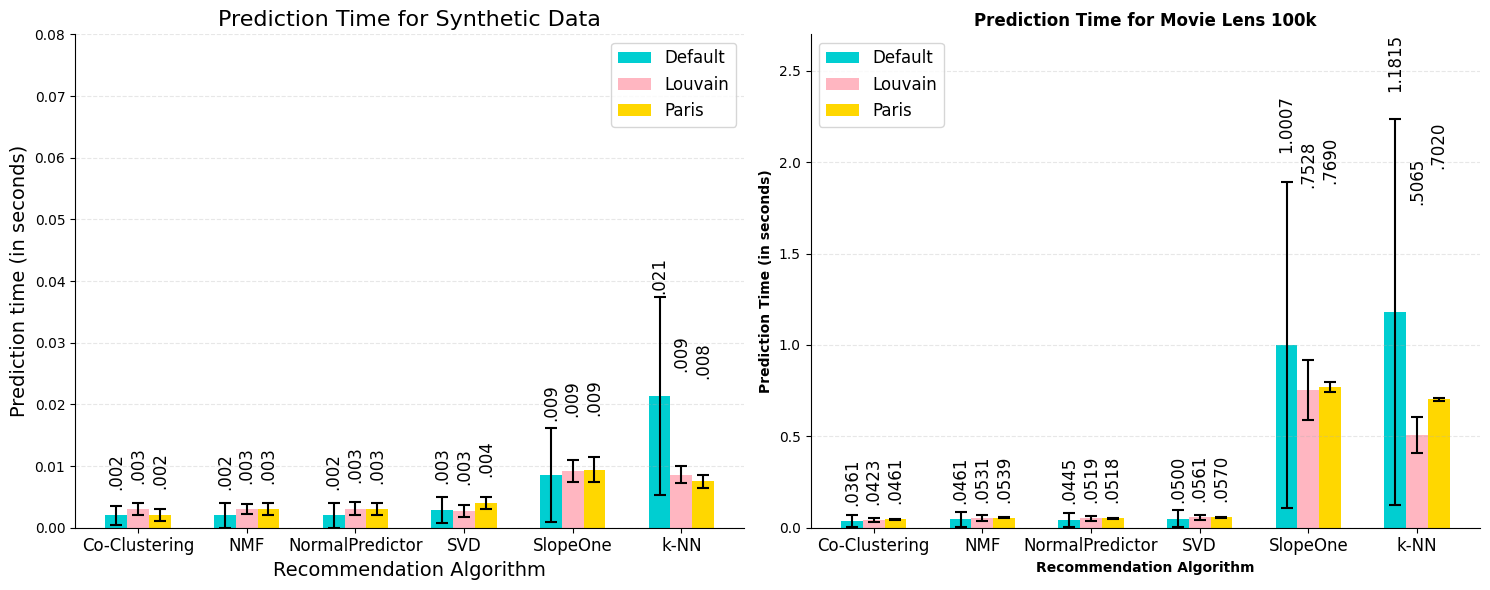

In [22]:
syntpd = df[df['dataset'] == 'synthetic'][['community_detector', 'algorithm_rec', 'test_runtime']]
syntpd = syntpd.sort_values(by=['algorithm_rec', 'community_detector'])
run_synt = syntpd['test_runtime'].values
run_synt = run_synt.reshape(-1, 3)
errorpd = errors[errors['dataset'] == 'synthetic'][['community_detector', 'algorithm_rec', 'test_runtime']]
errorpd = errorpd.sort_values(by=['algorithm_rec', 'community_detector'])
errors_synt = errorpd['test_runtime'].values
errors_synt = errors_synt.reshape(-1, 3)

realpd = df[df['dataset'] == 'real'][['community_detector', 'algorithm_rec', 'test_runtime']]
realpd = realpd.sort_values(by=['algorithm_rec', 'community_detector'])
run_real = realpd['test_runtime'].values
run_real = run_real.reshape(-1, 3)
errorpd = errors[errors['dataset'] == 'real'][['community_detector', 'algorithm_rec', 'test_runtime']]
errorpd = errorpd.sort_values(by=['algorithm_rec', 'community_detector'])
errors_real = errorpd['test_runtime'].values
errors_real = errors_real.reshape(-1, 3)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the bars and adding labels for the synthetic dataset
for i, method in enumerate(methods):
    axes[0].bar(index + (i * bar_width), run_synt[:, i], yerr=errors_synt[:, i], width=bar_width, label=method, 
                color=colors[i], capsize=4, error_kw={'capthick': 1.5})
    for j, value in enumerate(run_synt[:, i]):
        if j == 4:
            formatted_value = format(value, '.3f').lstrip('0')
            axes[0].annotate(formatted_value, xy=(index[j] + (i * bar_width), value),
                            xytext=(0, 65), textcoords='offset points', ha='center', va='top',
                            fontsize=12, color='black', rotation='vertical')#, fontweight='bold')
        elif j ==5:
            formatted_value = format(value, '.3f').lstrip('0')
            axes[0].annotate(formatted_value, xy=(index[j] + (i * bar_width), value),
                            xytext=(0, 100), textcoords='offset points', ha='center', va='top',
                            fontsize=12, color='black', rotation='vertical')#, fontweight='bold')
        else:
            formatted_value = format(value, '.3f').lstrip('0')
            axes[0].annotate(formatted_value, xy=(index[j] + (i * bar_width), value),
                            xytext=(0, 45), textcoords='offset points', ha='center', va='top',
                            fontsize=12, color='black', rotation='vertical')#, fontweight='bold')            

# Additional plot settings for the synthetic dataset
axes[0].set_xlabel('Recommendation Algorithm', fontsize=14)#, fontweight='bold')
axes[0].set_ylabel('Prediction time (in seconds)', fontsize=14)#, fontweight='bold')
axes[0].set_title('Prediction Time for Synthetic Data', fontsize=16)#, fontweight='bold')
axes[0].set_xticks(index + (bar_width * (len(methods) - 1) / 2))
axes[0].set_xticklabels(models, ha='center')
axes[0].set_ylim(0, 0.08)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].legend(fontsize=12)

# Add horizontal grid lines for the synthetic dataset
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

for i, method in enumerate(methods):
    axes[1].bar(index + (i * bar_width), run_real[:, i], yerr=errors_real[:, i], width=bar_width, label=method, 
                color=colors[i], capsize=4, error_kw={'capthick': 1.5})
    for j, value in enumerate(run_real[:, i]):
        if j == 4:
            formatted_value = format(value, '.4f').lstrip('0')
            axes[1].annotate(formatted_value, xy=(index[j] + (i * bar_width), value),
                            xytext=(0, 180), textcoords='offset points', ha='center', va='top',
                            fontsize=12, color='black', rotation='vertical')#, fontweight='bold')
        elif j == 5:
            formatted_value = format(value, '.4f').lstrip('0')
            axes[1].annotate(formatted_value, xy=(index[j] + (i * bar_width), value),
                            xytext=(0, 200), textcoords='offset points', ha='center', va='top',
                            fontsize=12, color='black', rotation='vertical')#, fontweight='bold')
        else:
            formatted_value = format(value, '.4f').lstrip('0')
            axes[1].annotate(formatted_value, xy=(index[j] + (i * bar_width), value),
                            xytext=(0, 45), textcoords='offset points', ha='center', va='top',
                            fontsize=12, color='black', rotation='vertical')#, fontweight='bold')
# Additional plot settings for the real dataset
axes[1].set_xlabel('Recommendation Algorithm', fontweight='bold')
axes[1].set_ylabel('Prediction Time (in seconds)', fontweight='bold')
axes[1].set_title('Prediction Time for Movie Lens 100k', fontweight='bold')
axes[1].set_xticks(index + (bar_width * (len(methods) - 1) / 2))
axes[1].set_xticklabels(models, ha='center')
axes[1].set_ylim(0, 2.7)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].legend(fontsize=12)

# Add horizontal grid lines for the real dataset
axes[1].grid(axis='y', linestyle='--', alpha=0.3)

# Remove the top and right spines for both subplots
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.savefig('../plots/experiment_results/cost_comparison/prediction_plot_V2.pdf')
plt.show()
